In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns


In [3]:
df = pd.read_csv("Diabetes_Prediction_2018_2022.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0,1,0,40,1,0,0,0,0,...,0,1,0,5,18,15,1,0,9,4
1,0,0,0,0,25,1,0,0,1,0,...,0,0,1,3,0,0,0,0,7,6
2,0,1,1,1,28,0,0,0,0,1,...,0,1,1,5,30,30,1,0,9,4
3,0,1,0,1,27,0,0,0,1,1,...,0,1,0,2,0,0,0,0,11,3
4,0,1,1,1,24,0,0,0,1,1,...,0,1,0,2,3,0,0,0,11,5


In [4]:
df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
count,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,...,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000,249998.000000
mean,0.294538,0.427631,0.423815,0.962368,28.385631,0.445396,0.040800,0.093909,0.759714,0.636049,...,0.056484,0.951036,0.083489,2.503672,3.171241,4.222078,0.167269,0.441368,8.041152,5.056192
std,0.695924,0.494736,0.494163,0.190306,6.620666,0.497010,0.197828,0.291702,0.427258,0.481136,...,0.230855,0.215794,0.276620,1.065986,7.382264,8.694342,0.373217,0.496551,3.049967,0.979742
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249998 entries, 0 to 249997
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          249998 non-null  int64
 1   HighBP                249998 non-null  int64
 2   HighChol              249998 non-null  int64
 3   CholCheck             249998 non-null  int64
 4   BMI                   249998 non-null  int64
 5   Smoke                 249998 non-null  int64
 6   Stroke                249998 non-null  int64
 7   HeartDiseaseorAttack  249998 non-null  int64
 8   PhysicalActivity      249998 non-null  int64
 9   Fruits                249998 non-null  int64
 10  Veggies               249998 non-null  int64
 11  AlcoholConsump        249998 non-null  int64
 12  AnyHealthcare         249998 non-null  int64
 13  NoDocbcCost           249998 non-null  int64
 14  GenHlth               249998 non-null  int64
 15  MentHlth              249998 non-n

In [9]:
df.shape

(249998, 21)

# Variable Analysis

In [10]:
def pairplot(dataframe):
    num_cols = dataframe.shape[1]
    fig, axes = plt.subplots(num_cols, num_cols, figsize=(15, 15))
    
    for i in range(num_cols):
        for j in range(num_cols):
            if i == j:
                axes[i, j].hist(dataframe.iloc[:, i], bins=20)
                axes[i, j].set_title(dataframe.columns[i])
            else:
                axes[i, j].scatter(dataframe.iloc[:, j], dataframe.iloc[:, i], alpha=0.5)
                axes[i, j].set_xlabel(dataframe.columns[j])
                axes[i, j].set_ylabel(dataframe.columns[i])
    
    plt.tight_layout()
    plt.show()

In [22]:
diabetes_column = df['Diabetes_012']
df_scaled = df.drop(columns=['Diabetes_012'])

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df_scaled)

df_scaled = pd.DataFrame(scaled_data, columns=df_scaled.columns)

df_scaled['Diabetes_012'] = diabetes_column
df_scaled = df_scaled[['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoke', 'Stroke',
       'HeartDiseaseorAttack', 'PhysicalActivity', 'Fruits', 'Veggies',
       'AlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth',
       'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education']]
df_scaled.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
0,0,0.0,1.0,0.0,0.325581,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.00,0.6,0.5,1.0,0.0,0.666667,0.6
1,0,0.0,0.0,0.0,0.151163,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.500000,1.0
2,0,1.0,1.0,1.0,0.186047,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.00,1.0,1.0,1.0,0.0,0.666667,0.6
3,0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.833333,0.4
4,0,1.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.25,0.1,0.0,0.0,0.0,0.833333,0.8


In [23]:
def scatter_plot_with_diabetes(df):
    num_cols = df.shape[1]
    num_rows = 4
    num_cols_per_row = 5
    fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(20, 16))

    for i in range(1, num_cols):  # Start from index 1 to exclude 'Diabetes_012'
        row_index = (i - 1) // num_cols_per_row
        col_index = (i - 1) % num_cols_per_row
        axes[row_index, col_index].scatter(df.iloc[:, i], df['Diabetes_012'], alpha=0.5)
        axes[row_index, col_index].set_xlabel(df.columns[i])
        axes[row_index, col_index].set_ylabel('Diabetes_012')

    plt.tight_layout()
    plt.show()

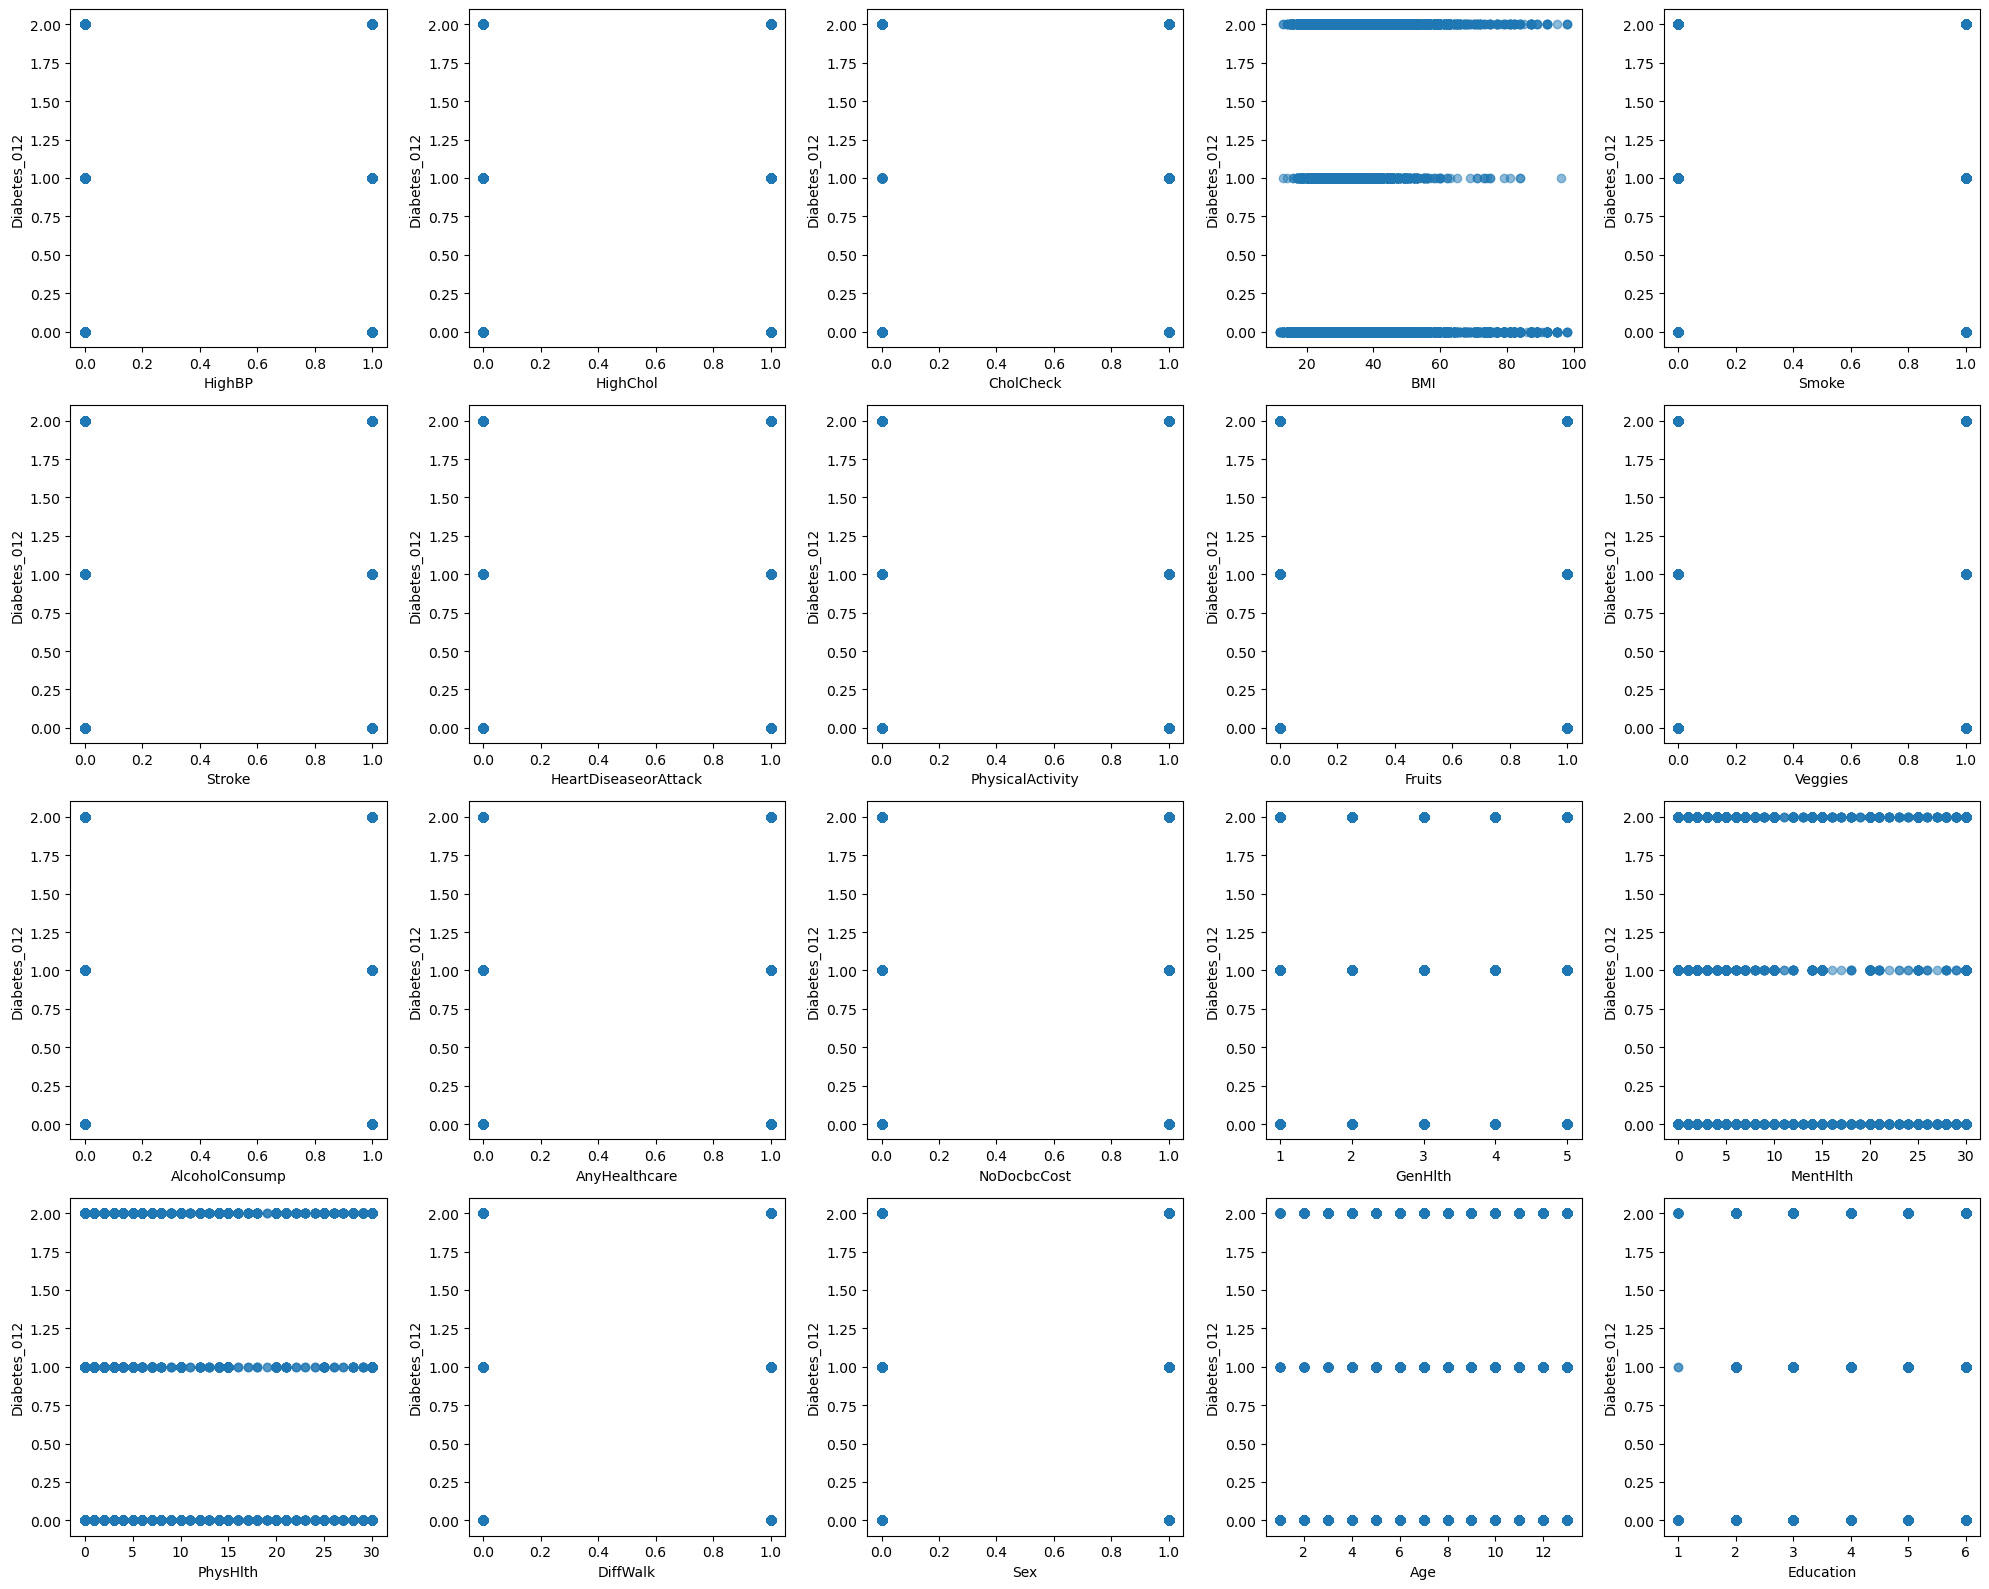

In [24]:
scatter_plot_with_diabetes(df)

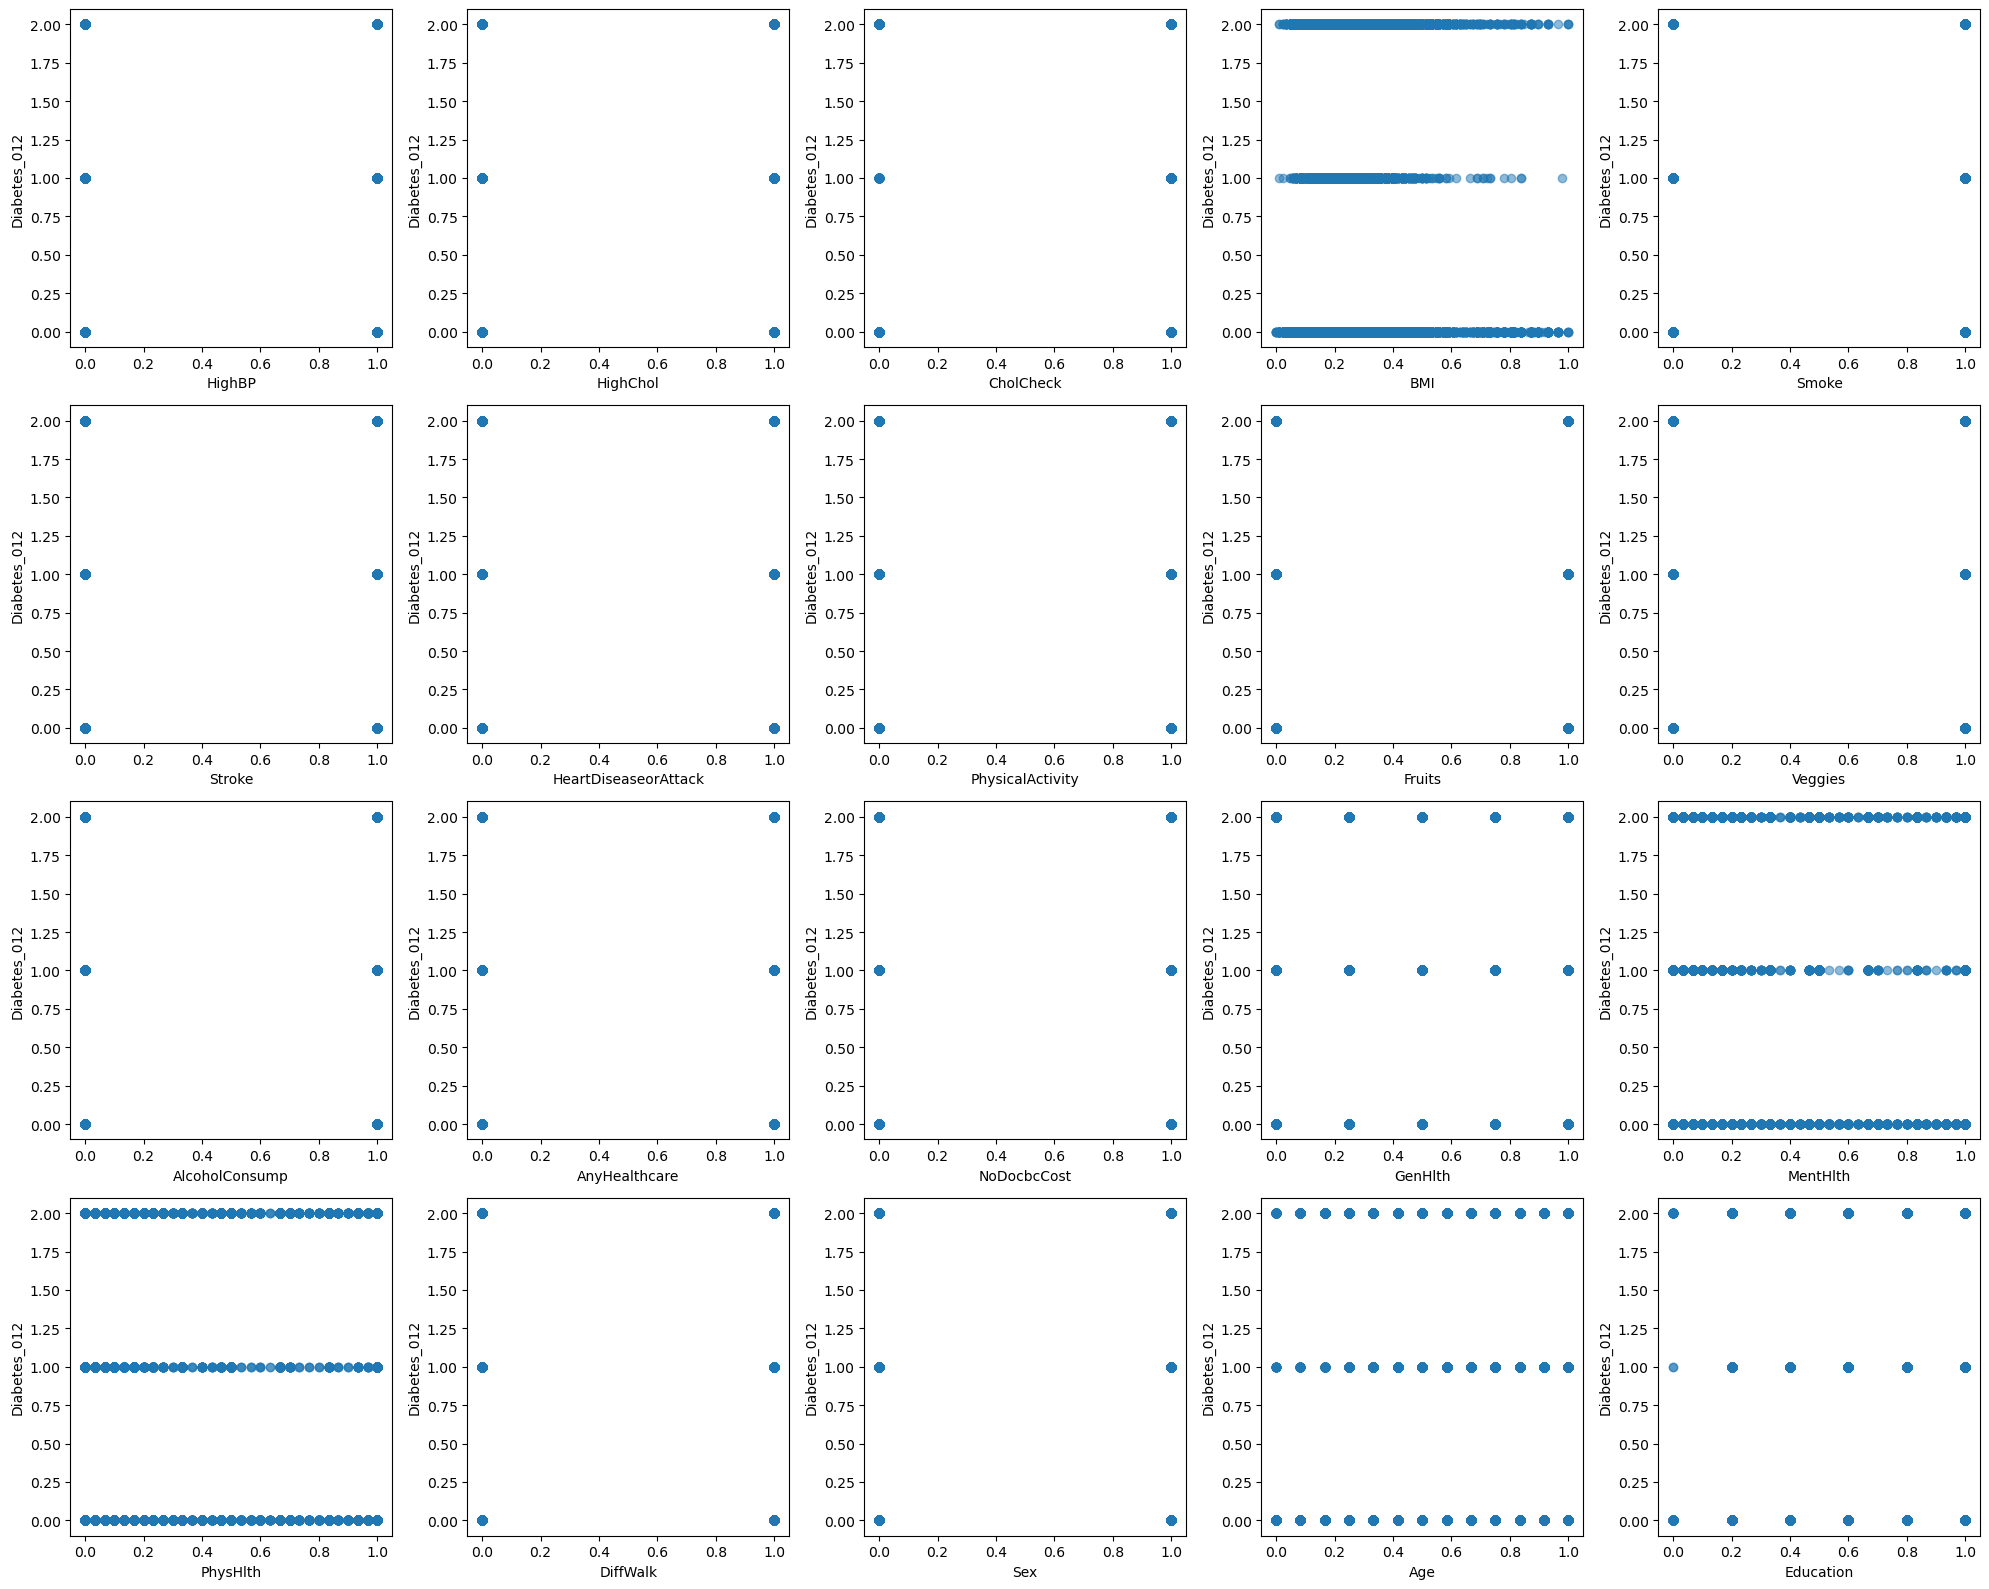

In [25]:
scatter_plot_with_diabetes(df_scaled)

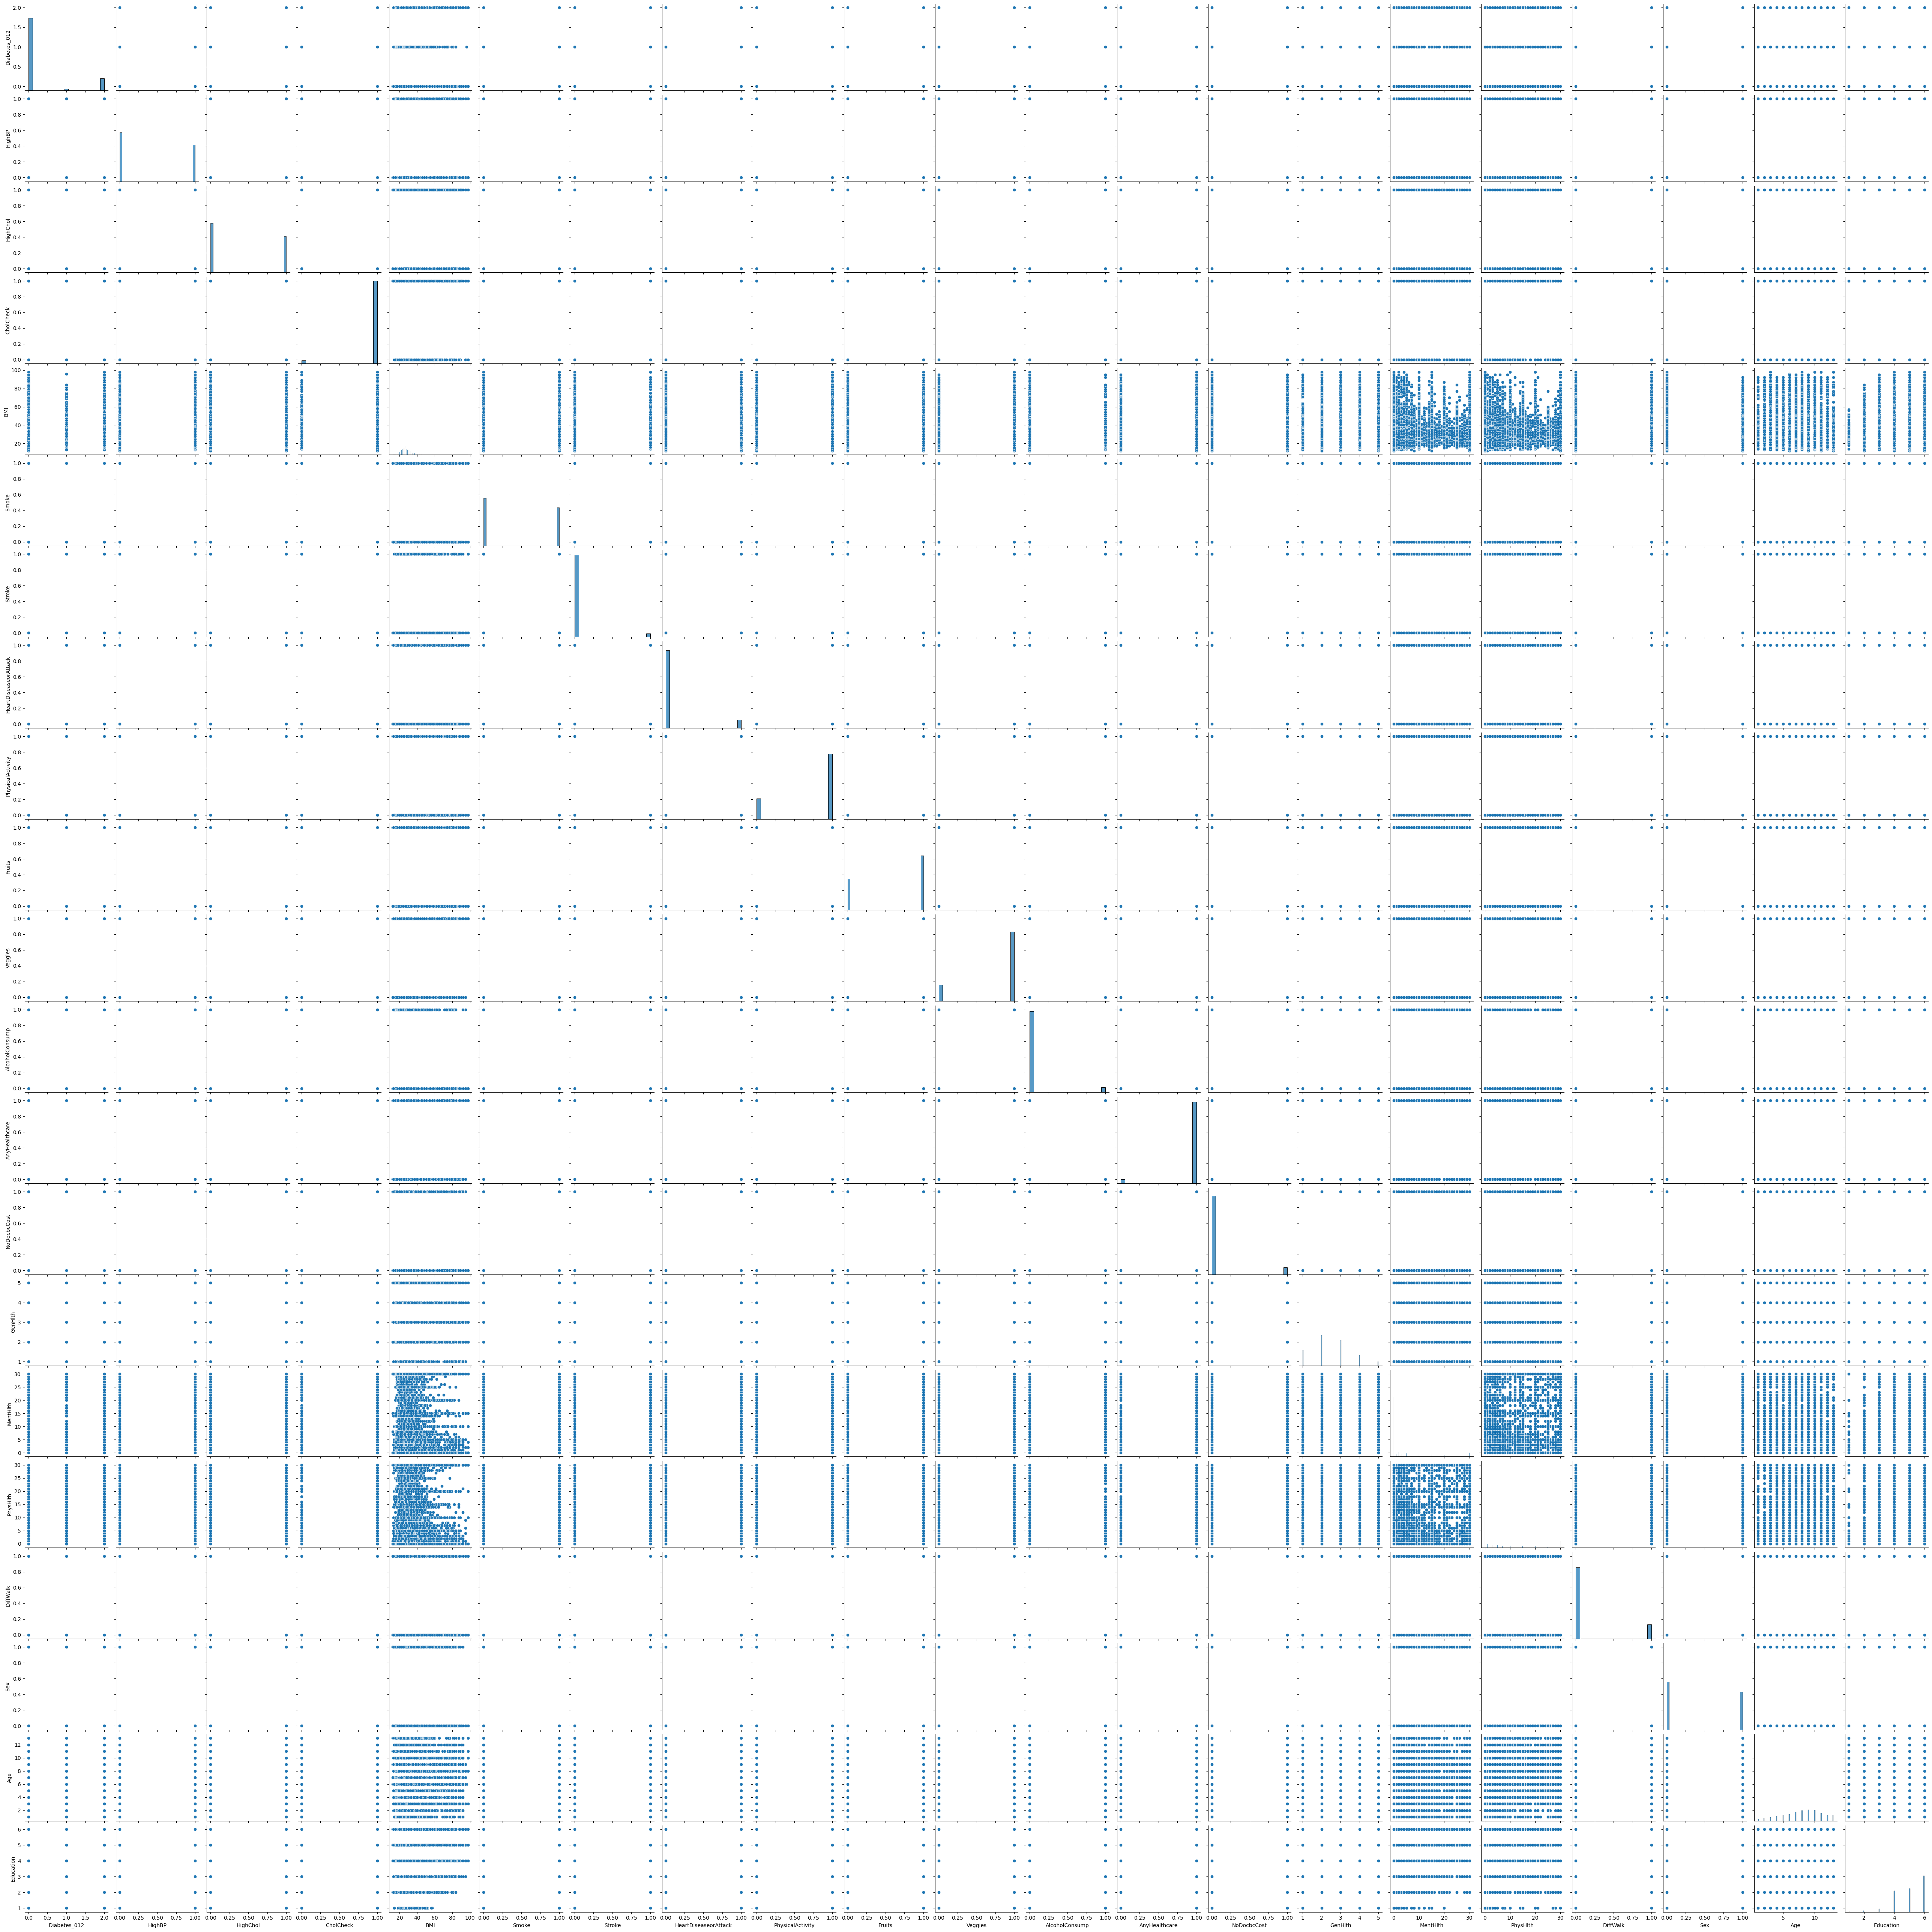

In [27]:
sns.pairplot(df)

In [30]:
df_corr = df.corr()
df_corr

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoke,Stroke,HeartDiseaseorAttack,PhysicalActivity,Fruits,...,AlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education
Diabetes_012,1.000000,0.271323,0.209294,0.067293,0.225294,0.064170,0.107494,0.179746,-0.120440,-0.041679,...,-0.057718,0.014635,0.035353,0.301277,0.073744,0.176018,0.223192,0.032195,0.184004,-0.128220
HighBP,0.271323,1.000000,0.298583,0.098488,0.213931,0.098372,0.130504,0.208919,-0.124890,-0.040013,...,-0.003313,0.037828,0.016703,0.299126,0.055280,0.160816,0.222913,0.053435,0.344470,-0.140434
HighChol,0.209294,0.298583,1.000000,0.086059,0.107228,0.092312,0.092927,0.181595,-0.077884,-0.040837,...,-0.010964,0.042047,0.012762,0.207800,0.061287,0.121551,0.143781,0.032029,0.272230,-0.069746
CholCheck,0.067293,0.098488,0.086059,1.000000,0.034688,-0.009377,0.024421,0.044278,0.005381,0.024418,...,-0.023727,0.117794,-0.059158,0.046013,-0.008767,0.031867,0.040418,-0.021741,0.090804,0.002417
BMI,0.225294,0.213931,0.107228,0.034688,1.000000,0.013567,0.020406,0.052858,-0.148409,-0.088325,...,-0.048858,-0.018967,0.058378,0.241492,0.086181,0.121240,0.197472,0.043287,-0.036464,-0.105728
Smoke,0.064170,0.098372,0.092312,-0.009377,0.013567,1.000000,0.061023,0.115837,-0.091409,-0.079937,...,0.101261,-0.023083,0.050209,0.167045,0.093083,0.118552,0.124813,0.091489,0.120442,-0.166025
Stroke,0.107494,0.130504,0.092927,0.024421,0.020406,0.061023,1.000000,0.203176,-0.070470,-0.013688,...,-0.017004,0.008568,0.035409,0.179772,0.070587,0.150152,0.178127,0.002812,0.127381,-0.077581
HeartDiseaseorAttack,0.179746,0.208919,0.181595,0.044278,0.052858,0.115837,0.203176,1.000000,-0.087356,-0.020080,...,-0.028933,0.018589,0.029840,0.258659,0.062842,0.181524,0.212186,0.087018,0.222275,-0.099139
PhysicalActivity,-0.120440,-0.124890,-0.077884,0.005381,-0.148409,-0.091409,-0.070470,-0.087356,1.000000,0.141601,...,0.011521,0.036558,-0.061284,-0.264286,-0.125515,-0.219510,-0.253056,0.030250,-0.093558,0.198497
Fruits,-0.041679,-0.040013,-0.040837,0.024418,-0.088325,-0.079937,-0.013688,-0.020080,0.141601,1.000000,...,-0.036000,0.032088,-0.044349,-0.102725,-0.068287,-0.045148,-0.048510,-0.092058,0.064544,0.109294


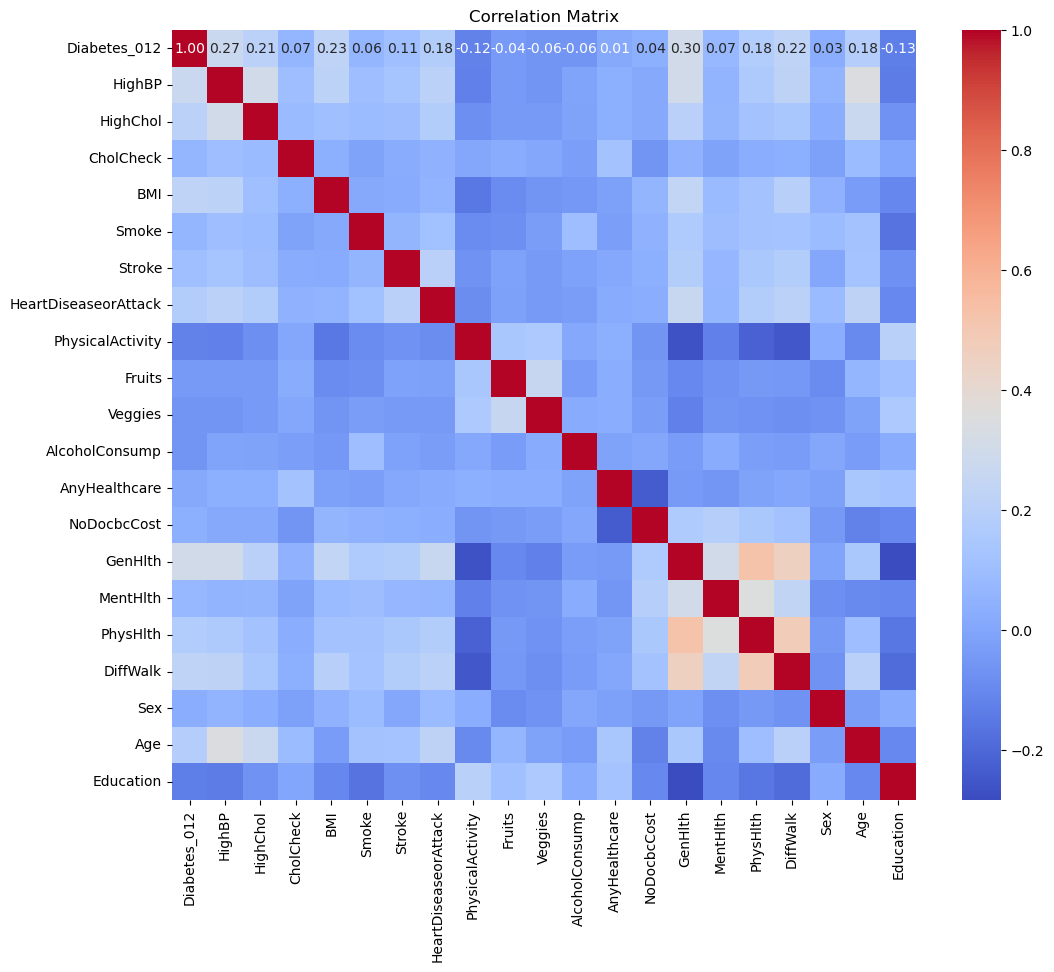

In [38]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix')
plt.show()